# NeuroCare SIP Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib

## Data Generation

In [2]:
# np.random.seed(42)

# def generate_data(n, ranges, condition):
#     data = []
#     for _ in range(n):
#         row = {
#             'TLC': np.random.randint(*ranges['TLC']),
#             'Lymphocytes(%)': np.random.randint(*ranges['Lymphocytes']),
#             'Polymorphs(%)': np.random.randint(*ranges['Polymorphs']),
#             'Protein': np.random.randint(*ranges['Protein']),
#             'Sugar': np.random.randint(*ranges['Sugar']),
#             'Condition': condition
#         }
#         data.append(row)
#     return pd.DataFrame(data)

# # Feature value ranges (inclusive-exclusive format for randint)
# normal_ranges = {
#     'TLC': (1, 5),  # <5
#     'Lymphocytes': (0, 11),  # 0–10
#     'Polymorphs': (0, 11),   # 0–10
#     'Protein': (6, 9),       # 6–8
#     'Sugar': (70, 100)       # 70–99
# }

# tbm_ranges = {
#     'TLC': (5, 251),          # 5–250
#     'Lymphocytes': (70, 101), # 70–100
#     'Polymorphs': (0, 31),    # 0–30
#     'Protein': (58, 201),     # 58–200
#     'Sugar': (20, 51)         # 20–50
# }

# pm_ranges = {
#     'TLC': (251, 401),        # >250
#     'Lymphocytes': (0, 21),   # 0–20
#     'Polymorphs': (20, 101),  # 20–100
#     'Protein': (201, 301),    # >200
#     'Sugar': (2, 31)          # 2–30
# }

# # Generate data
# normal_df = generate_data(15000, normal_ranges, 'Normal')
# tbm_df = generate_data(7500, tbm_ranges, 'Abnormal')
# pm_df = generate_data(7500, pm_ranges, 'Abnormal')

# # Combine and shuffle
# full_df = pd.concat([normal_df, tbm_df, pm_df], ignore_index=True)
# full_df = full_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Save to CSV
# full_df.to_csv("Augmented_Ranges.csv", index=False)

# print("✅ Dataset generated and saved as 'Augmented_Ranges.csv'")


In [3]:

# # Load the original dataset
# df = pd.read_csv("test-Sheet1.csv")
# df.columns = [col.strip() for col in df.columns]

# # Define target size
# target_samples = 5000
# existing_samples = len(df)
# samples_to_generate = target_samples - existing_samples

# # Ensure balanced augmentation
# class_distribution = df['Condition'].value_counts(normalize=True)
# grouped = df.groupby('Condition')

# # Function to generate integer-only, noise-added synthetic data
# def generate_augmented_data(group, n_samples):
#     synthetic = []
#     for _ in range(n_samples):
#         sample = group.sample(1, replace=True).iloc[0].copy()

#         sample['TLC'] = int(round(max(0, sample['TLC'] + np.random.normal(0, 1))))
#         sample['Lymphocytes(%)'] = int(round(np.clip(sample['Lymphocytes(%)'] + np.random.normal(0, 2), 0, 100)))
#         sample['Polymorphs(%)'] = int(round(np.clip(sample['Polymorphs(%)'] + np.random.normal(0, 2), 0, 100)))
#         sample['Protein'] = int(round(max(0, sample['Protein'] + np.random.normal(0, 5))))
#         sample['Sugar'] = int(round(max(0, sample['Sugar'] + np.random.normal(0, 3))))

#         synthetic.append(sample)
#     return pd.DataFrame(synthetic)

# # Generate synthetic samples for each class
# synthetic_df = pd.concat([
#     generate_augmented_data(group, int(samples_to_generate * class_distribution[cls]))
#     for cls, group in grouped
# ], ignore_index=True)

# # Combine and save
# augmented_df = pd.concat([df, synthetic_df], ignore_index=True)
# augmented_df.to_csv("augmented_testSheet1_dataset_5000.csv", index=False)

# print("✅ Augmented dataset saved as 'augmented_testSheet1_dataset_5000.csv'")


In [4]:
# import pandas as pd
# import numpy as np

# # Load the original dataset
# df = pd.read_csv("firstData.csv")
# df.columns = [col.strip() for col in df.columns]

# # Define target size
# target_samples = 5000
# existing_samples = len(df)
# samples_to_generate = target_samples - existing_samples

# # Ensure balanced augmentation
# class_distribution = df['Condition'].value_counts(normalize=True)
# grouped = df.groupby('Condition')

# # Function to generate integer-only, noise-added synthetic data
# def generate_augmented_data(group, n_samples):
#     synthetic = []
#     for _ in range(n_samples):
#         sample = group.sample(1, replace=True).iloc[0].copy()

#         sample['TLC'] = int(round(max(0, sample['TLC'] + np.random.normal(0, 1))))
#         sample['Lymphocytes(%)'] = int(round(np.clip(sample['Lymphocytes(%)'] + np.random.normal(0, 2), 0, 100)))
#         sample['Polymorphs(%)'] = int(round(np.clip(sample['Polymorphs(%)'] + np.random.normal(0, 2), 0, 100)))
#         sample['Protein'] = int(round(max(0, sample['Protein'] + np.random.normal(0, 5))))
#         sample['Sugar'] = int(round(max(0, sample['Sugar'] + np.random.normal(0, 3))))

#         synthetic.append(sample)
#     return pd.DataFrame(synthetic)

# # Generate synthetic samples for each class
# synthetic_df = pd.concat([
#     generate_augmented_data(group, int(samples_to_generate * class_distribution[cls]))
#     for cls, group in grouped
# ], ignore_index=True)

# # Combine and save
# augmented_df = pd.concat([df, synthetic_df], ignore_index=True)
# augmented_df.to_csv("augmented_firstData_5000.csv", index=False)

# print("✅ Augmented dataset saved as 'augmented_firstData_5000.csv'")


In [5]:
# import pandas as pd

# df1 = pd.read_csv("augmented_firstData_5000.csv")
# df2 = pd.read_csv("augmented_testSheet1_dataset_5000.csv")
# df3 = pd.read_csv("Augmented_Ranges.csv")

# df1.columns = [col.strip() for col in df1.columns]
# df2.columns = [col.strip() for col in df2.columns]
# df3.columns = [col.strip() for col in df3.columns]

# merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# # Shuffle the merged dataset
# merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# merged_df.to_csv("Normal_Abnormal_merged_random_dataset.csv", index=False)

# print("✅ Merged and shuffled dataset saved as 'Normal_Abnormal_merged_random_dataset.csv'")


In [7]:
# merged_df.info()

In [8]:
# merged_df['Condition'].value_counts()

In [9]:
# merged_df['Condition'] = merged_df['Condition'].replace({'TBM': 'Abnormal', 'PM': 'Abnormal'})

# print(merged_df['Condition'].value_counts())

# merged_df.to_csv("updated_condition_dataset.csv", index=False)

# print("✅ Saved as 'updated_condition_dataset.csv'")

### Load updated Dataset

In [10]:
df = pd.read_csv("updated_condition_dataset.csv")

## Data Preprocessing

In [11]:
df.shape

(39998, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TLC             39998 non-null  int64  
 1   Lymphocytes(%)  39998 non-null  int64  
 2   Polymorphs(%)   39998 non-null  int64  
 3   Protein         39998 non-null  float64
 4   Sugar           39998 non-null  float64
 5   Condition       39998 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [13]:
df.describe()

,TLC,Lymphocytes(%),Polymorphs(%),Protein,Sugar
count,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,134.204335,37.005950,22.666908,124.857465,64.814814
std,254.551754,38.971792,28.192702,198.147338,77.580226
min,0.000000,0.000000,0.000000,6.000000,0.000000
25%,3.000000,5.000000,3.000000,7.000000,27.000000
50%,31.000000,11.000000,9.000000,75.000000,50.000000
75%,245.000000,82.000000,30.000000,192.000000,84.000000
max,3102.000000,100.000000,100.000000,1691.000000,805.000000


In [15]:
df.duplicated().sum()

2352

In [16]:
df = df.drop_duplicates()

In [17]:
df.isnull().sum()

TLC               0
Lymphocytes(%)    0
Polymorphs(%)     0
Protein           0
Sugar             0
Condition         0
dtype: int64

In [18]:
df.shape

(37646, 6)

In [19]:
df['Condition'].value_counts()

Condition
Abnormal    22284
Normal      15362
Name: count, dtype: int64

In [27]:
le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])  

In [28]:
df['Condition'].value_counts()

Condition
0    22284
1    15362
Name: count, dtype: int64

In [29]:
negative_counts = (df < 0).sum()

print("🔍 Negative Values Per Feature:")
print(negative_counts)

🔍 Negative Values Per Feature:
TLC               0
Lymphocytes(%)    0
Polymorphs(%)     0
Protein           0
Sugar             0
Condition         0
dtype: int64


In [30]:
decimal_counts = (df % 1 != 0).sum()

print("🔍 Decimal (non-integer) Values Per Feature:")
print(decimal_counts)

🔍 Decimal (non-integer) Values Per Feature:
TLC                0
Lymphocytes(%)     0
Polymorphs(%)      0
Protein           32
Sugar             36
Condition          0
dtype: int64


## Class Ranges:
| Feature             | Normal | TBM     | PM      |
| ------------------- | ------ | ------- | ------- |
| **TLC**             | < 5    | 5 – 250 | > 250   |
| **Lymphocytes**     | 0–10%  | 70–100% | 0–20%   |
| **Polymorphs**      | 0–10%  | 0–30%   | 20–100% |
| **Protein** (mg/dl) | 6–8    | 58–200  | > 200   |
| **Sugar** (mg/dl)   | 70–99  | 20–50   | 2–30    |


## Data Visualization

<Axes: xlabel='Condition', ylabel='count'>

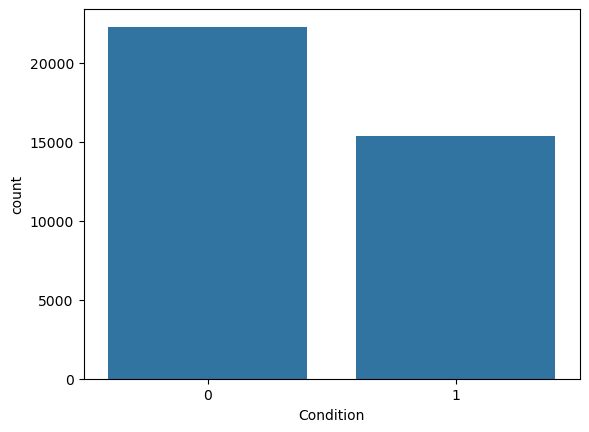

In [31]:
sns.countplot(data=df, x='Condition')

<Axes: >

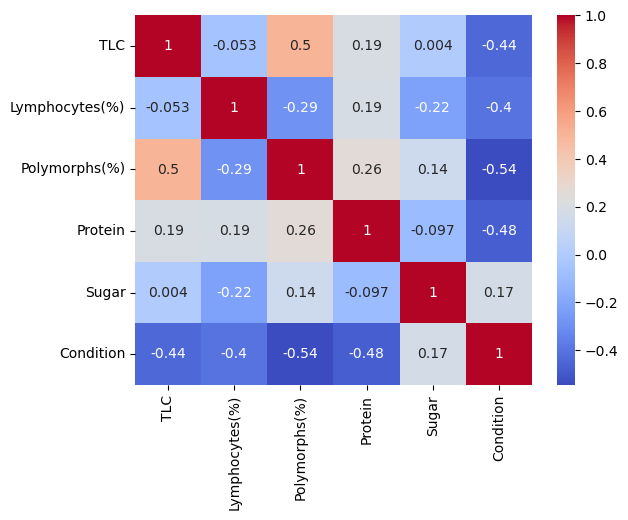

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Condition', ylabel='Polymorphs(%)'>

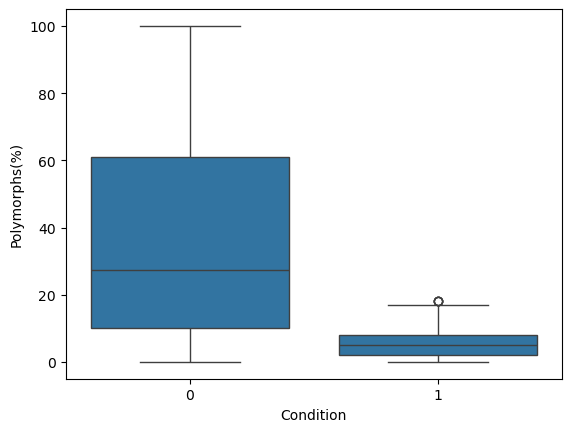

In [33]:
sns.boxplot(x='Condition', y='Polymorphs(%)', data=df)

<Axes: xlabel='Condition', ylabel='Lymphocytes(%)'>

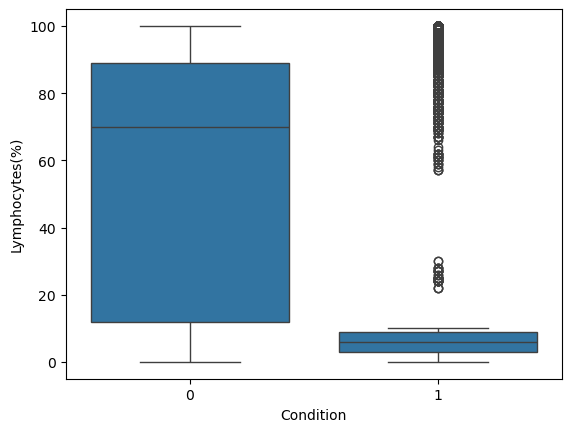

In [34]:
sns.boxplot(x='Condition', y='Lymphocytes(%)', data=df)

<Axes: xlabel='Condition', ylabel='Sugar'>

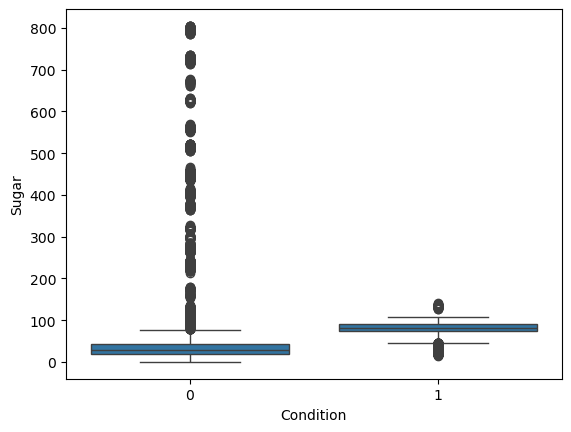

In [38]:
sns.boxplot(x='Condition', y='Sugar', data=df)

<Axes: xlabel='Condition', ylabel='Protein'>

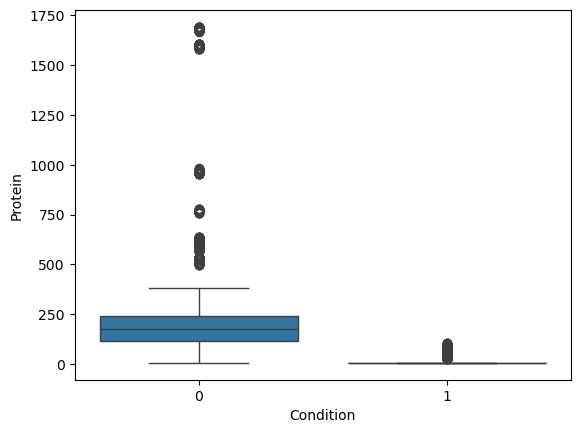

In [39]:
sns.boxplot(x='Condition', y='Protein', data=df)

<Axes: xlabel='Condition', ylabel='TLC'>

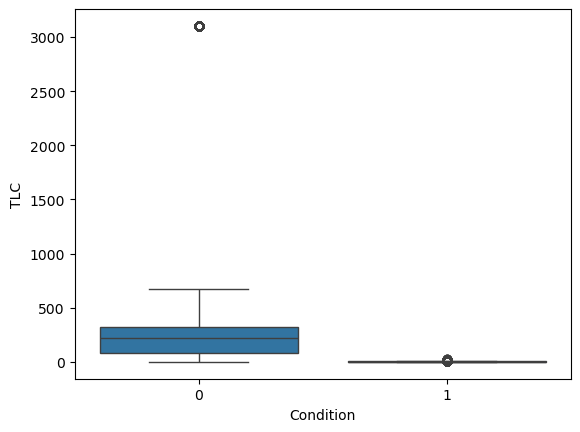

In [37]:
sns.boxplot(x='Condition', y='TLC', data=df)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Normal → 1, Abnormal → 0
le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])  

X = df.drop("Condition", axis=1)
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

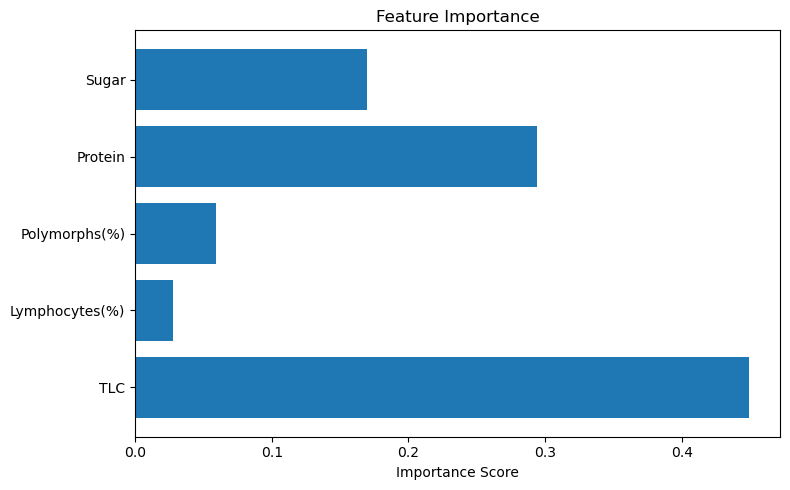

Feature Importance Score
TLC               0.449367
Protein           0.294393
Sugar             0.169462
Polymorphs(%)     0.059131
Lymphocytes(%)    0.027647
dtype: float64


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
print("Feature Importance Score")
print(pd.Series(importances, index=features).sort_values(ascending=False))

In [41]:
df.sample(15)

,TLC,Lymphocytes(%),Polymorphs(%),Protein,Sugar,Condition
14257,297,11,79,297.0,29.0,0
30907,7,100,0,71.0,98.0,1
9371,247,92,4,143.0,48.0,0
25034,368,15,53,296.0,17.0,0
38203,2,4,5,6.0,81.0,1
6070,209,94,24,101.0,20.0,0
209,172,88,12,129.0,49.0,0
9050,4,1,1,6.0,83.0,1
9130,373,6,74,251.0,13.0,0
3502,362,5,77,214.0,5.0,0
